In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from scipy import stats as st
import os

In [20]:
df = pd.read_csv('datasets/games.csv')

In [3]:
df.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [11]:
# Так наглядней чем df.columns
for column in df.columns:
    print(column)

name
platform
year_of_release
genre
na_sales
eu_sales
jp_sales
other_sales
critic_score
user_score
rating


In [21]:
df.columns = df.columns.map(lambda x: x.lower())

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [28]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [23]:
df['year_of_release'].isna().sum()

269

<AxesSubplot: >

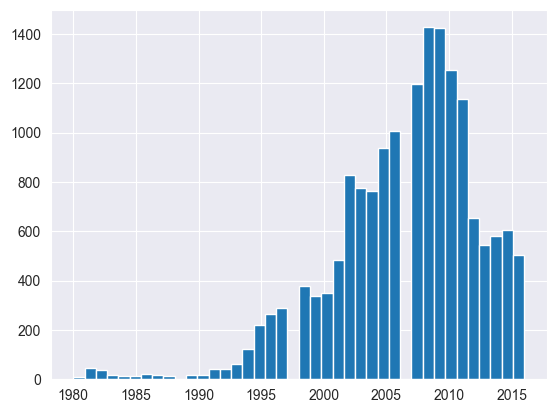

In [26]:
df['year_of_release'].hist(bins=40)

In [19]:
# Преведём данные следующих столбцов к формату int
# Т.к. на данном этапе без детального исследования не понятно, можно ли данные  с пропусками удалить и какая причина пропуска или закономерность
# заменим пропуски года релиза игры на 0. А потом при необходимости земеним это значение или удолим строки с этим занчением
df['year_of_release'].fillna(0, inplace=True)
df['year_of_release'] = df['year_of_release'].astype('int')

ValueError: could not convert string to float: 'tbd'

In [39]:
len(df[df['user_score'] == 'tbd'])

2424

In [ ]:
# TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

In [47]:
df['user_score'] = df['user_score'].map(lambda  x: x.replace('tbd', 'NaN') if x=='tbd' else x)
df['user_score'] = df['user_score'].astype('float')